### Blog Generation

In [12]:
import os 
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [13]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="qwen-2.5-32b")

llm.invoke("hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 30, 'total_tokens': 40, 'completion_time': 0.05, 'prompt_time': 0.003693828, 'queue_time': 0.228742049, 'total_time': 0.053693828}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-5ea03144-0ca4-4337-ba37-9b94d0d7aece-0', usage_metadata={'input_tokens': 30, 'output_tokens': 10, 'total_tokens': 40})

#### Blog generation

1. Create a blog title based on given topic_name

2. Crete the content from llm 

3. Present to user

In [14]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display,Image

class BlogState(TypedDict):
    blog_topic: str
    blog_title: str
    blog_content: str

In [15]:
#function which can be used as nodes
def blog_title_generation(state:BlogState):
    "Generate the title of blog based on given topic name"
    title = llm.invoke(f"generate a crative Blog title based on provied {state['blog_topic']}")
    print(title)
    return {"blog_title": title}

def blog_content_generation(state:BlogState):
    "Generate the content of blog based on given topic name"
    if 'blog_title' not in state:
        raise KeyError("Missing 'blog_title' in state.")
    content = llm.invoke(f"generate a crative Blog content with diffent titles and pragraphs based on provied {state['blog_title']} in 5000 words")
    print(content)
    return {"blog_content": content}

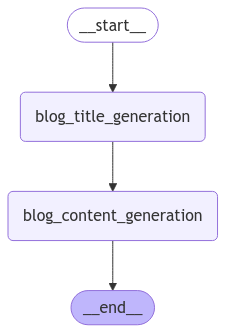

In [16]:
# workflow building
builder = StateGraph(BlogState)

#add Node
builder.add_node("blog_title_generation",blog_title_generation)
builder.add_node("blog_content_generation",blog_content_generation)

#add edges
builder.add_edge(START,"blog_title_generation")
builder.add_edge("blog_title_generation","blog_content_generation")
builder.add_edge("blog_content_generation",END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
res = graph.invoke({"blog_topic":"Write a blog about generative AI"})


content='"Unleashing Creativity: The Boundless Potential of Generative AI"' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 46, 'total_tokens': 63, 'completion_time': 0.085, 'prompt_time': 0.004611183, 'queue_time': 0.22838192300000001, 'total_time': 0.089611183}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None} id='run-fa821943-9712-4f90-b093-f5fb94353b00-0' usage_metadata={'input_tokens': 46, 'output_tokens': 17, 'total_tokens': 63}
content="### Unleashing Creativity: The Boundless Potential of Generative AI\n\n#### Introduction: The Dawn of a New Era\n\nIn the rapidly evolving landscape of technology, Generative AI stands out as a beacon of innovation, promising to revolutionize the way we create, interact, and innovate. This article delves into the vast potential of Generative AI, exploring its applications, benefits, and the future it promises to bring. From art to medi

In [24]:
print(res)

{'blog_topic': 'Write a blog about generative AI', 'blog_title': AIMessage(content='"Unleashing Creativity: The Boundless Potential of Generative AI"', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 46, 'total_tokens': 63, 'completion_time': 0.085, 'prompt_time': 0.004611183, 'queue_time': 0.22838192300000001, 'total_time': 0.089611183}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-fa821943-9712-4f90-b093-f5fb94353b00-0', usage_metadata={'input_tokens': 46, 'output_tokens': 17, 'total_tokens': 63}), 'blog_content': AIMessage(content="### Unleashing Creativity: The Boundless Potential of Generative AI\n\n#### Introduction: The Dawn of a New Era\n\nIn the rapidly evolving landscape of technology, Generative AI stands out as a beacon of innovation, promising to revolutionize the way we create, interact, and innovate. This article delves into the vast potential of

In [26]:
res['blog_title'].content

'"Unleashing Creativity: The Boundless Potential of Generative AI"'

In [ ]:
res['blog_content'].content

"### Unleashing Creativity: The Boundless Potential of Generative AI\n\n#### Introduction: The Dawn of a New Era\n\nIn the rapidly evolving landscape of technology, Generative AI stands out as a beacon of innovation, promising to revolutionize the way we create, interact, and innovate. This article delves into the vast potential of Generative AI, exploring its applications, benefits, and the future it promises to bring. From art to medicine, from entertainment to education, Generative AI is not just a technological advancement—it is the dawn of a new era where creativity knows no bounds.\n\n#### The Genesis of Generative AI\n\nTo understand the profound impact of Generative AI, we must first explore its origins. Generative AI, at its core, is a type of artificial intelligence that uses data to generate new content, whether it’s text, images, music, or even code. Unlike traditional AI models, which are primarily designed to recognize patterns and make predictions, Generative AI is capab